#### <strong>第一次作品：主成分分析實作</strong>
學號：410978002

姓名：謝元皓

 <font color=skyblue>作品目標</font>：透過python將主成分概念視覺化表現出來




<hr>

第 1 題：

有一組資料來自義大利某個地區三個紅酒製造商所產的紅酒，資料內容包括的 178 支紅酒的 13 種化學成分。利用這組資料回答下列問題：

(1) 繪製變數間的相關係數圖，以觀察變數間是否存在相關性。
- 在sklearn套件中下載紅酒資料
- 造出變數間的相關矩陣
- 由藍色到紅色依序表示相關程度由低到高

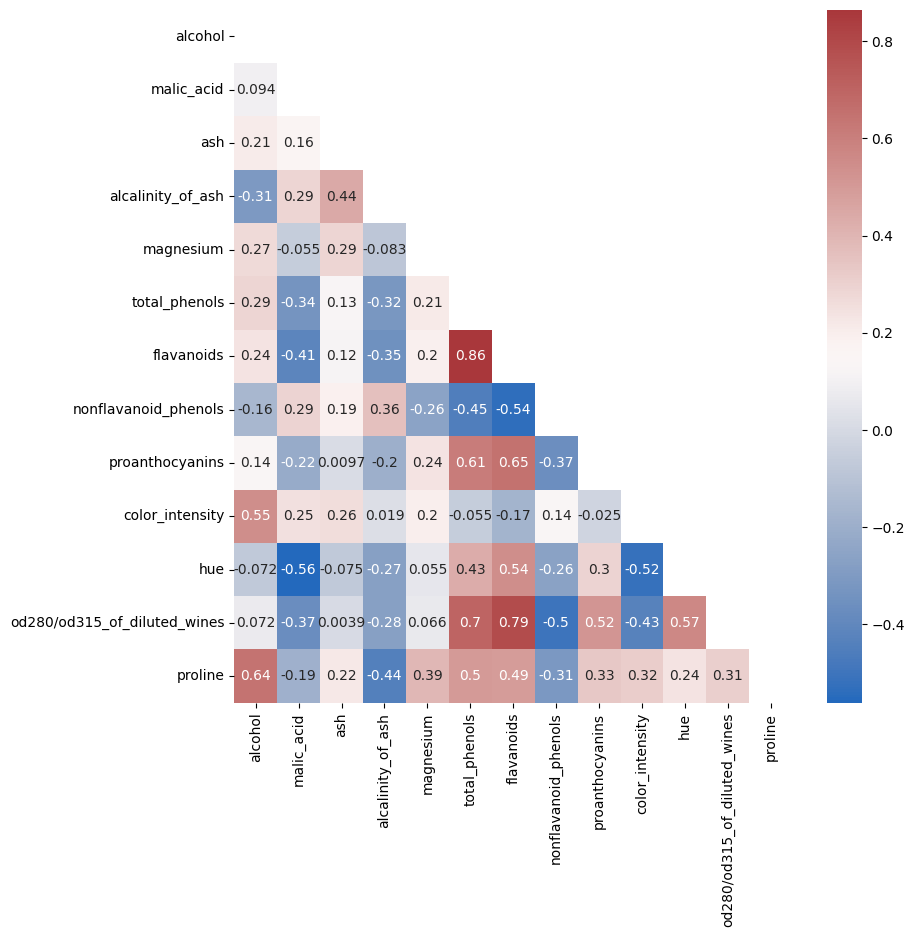

In [2]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
# Load the wine dataset
X, y = load_wine(return_X_y=True, as_frame=True)
labels = X.columns
# Plot the correlation matrix
plt.figure(figsize = (9, 9))
R = X.corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mask 
seaborn.heatmap(R, annot=True, mask = mask, cmap='vlag')
plt.show()

結論: 
- 由圖形中可以看出，Flavanoids和Total_Phenols此兩變數最高度相關
- 相關係數矩陣為對稱矩陣，因此僅呈現下半部。
<hr>

(2)繪製含每個化學成分變數盒鬚圖，分別畫為標準化與標準化。
- 資料未標準化之前為極度不平衡資料，可看出唯獨Proline 值特別大，因此需要做資料前處理
- 標準化後才不會受原始變數的數字大小所影響
- ratings為未標準化資料矩陣，ratings_為標準化資料矩陣

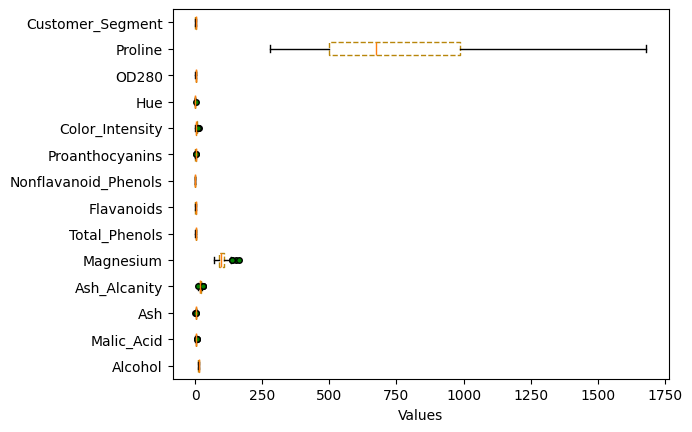

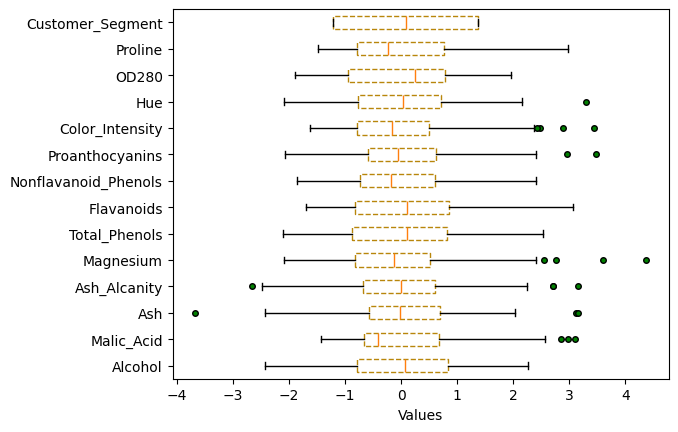

In [3]:
df = pd.read_excel('wine.xlsx')
ratings = np.array(df)
categories = df.columns
fig, ax = plt.subplots()
boxprops = dict(linestyle = '--', linewidth = 1, \
color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green',
markersize = 4, linestyle = 'none')
ax.boxplot(ratings, boxprops = boxprops, \
flierprops = flierprops, \
labels = categories, vert = False)
ax.set_xlabel('Values')
plt.show()

df = pd.read_excel('wine.xlsx')
ratings = np.array(df)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ratings)
ratings_ = scaler.transform(ratings)
categories = df.columns
fig, ax = plt.subplots()
boxprops = dict(linestyle = '--', linewidth = 1, \
color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green',
markersize = 4, linestyle = 'none')
ax.boxplot(ratings_, boxprops = boxprops, \
flierprops = flierprops, \
labels = categories, vert = False)
ax.set_xlabel('Values')
plt.show()

(3) 進行主成分分析，繪製特徵值由大而小的分布與 scree plot。

- 利用numpy指令cov計算樣本共變異數矩陣 $S_x$
- 比較後發現$S_X$與$S_X$-formula一致
- ratings_ is a 178 by 13 data matrix

In [4]:
import numpy as np
Sx = np.cov(ratings_.T, bias=False)
N = ratings_.shape[0]
mu_x = ratings_.mean(axis = 0)
Tmp = ratings_ - mu_x
Sx_formula = Tmp.T @ Tmp / (N - 1)
#print(Sx_formula)

接著進一步對共變異矩陣$S_X$進行特徵值與特徵向量分析，取得由大而小排列的特徵值及相對應特徵向量，最後再將特徵值與特徵向量合併回到原來的樣本共變異矩陣。

In [5]:
from numpy.linalg import eig
from numpy.linalg import inv
w, v = eig(Sx)
idx = np.argsort(-w) #sort eigenvalues in descending order
# idx = np.argsort(w)[::−1]
eigvals = w[idx]
eigvecs = v[:, idx]
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T

將特徵分布印出觀察以下兩圖 
- Screen plot 主成分由大到小的分布
- Pareto plot 加入累積變異的比例 

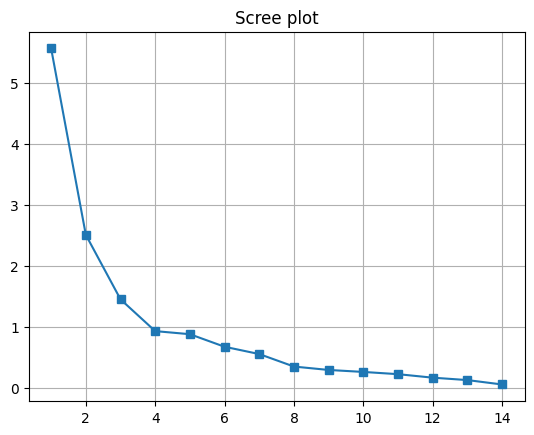

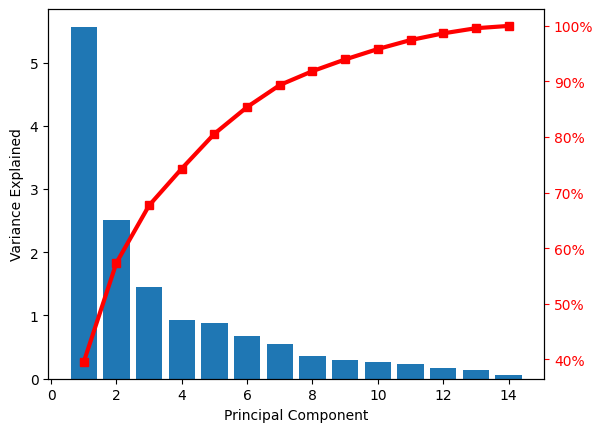

In [6]:
from matplotlib.ticker import PercentFormatter
plt.figure()
x = np.arange(1, 1+len(eigvals))
plt.plot(x, eigvals, marker='s')
plt.title('Scree plot')
plt.grid(True)
plt.show()
fig, ax = plt.subplots()
x = np.arange(1, 1+len(eigvals))
ax.bar(x, eigvals)
ax2 = ax.twinx()
ax2.plot(x, eigvals.cumsum()/eigvals.sum()*100, \
marker='s', color='red', lw=3)
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance Explained')
plt.show()

(4) 利用主成分分析取得前兩項成分，並繪製其散布圖
- 左圖為資料不做標準化，取前兩大主成分得到的散佈圖。
- 右圖為資料標準化後，取兩個主成分得到的散佈圖。


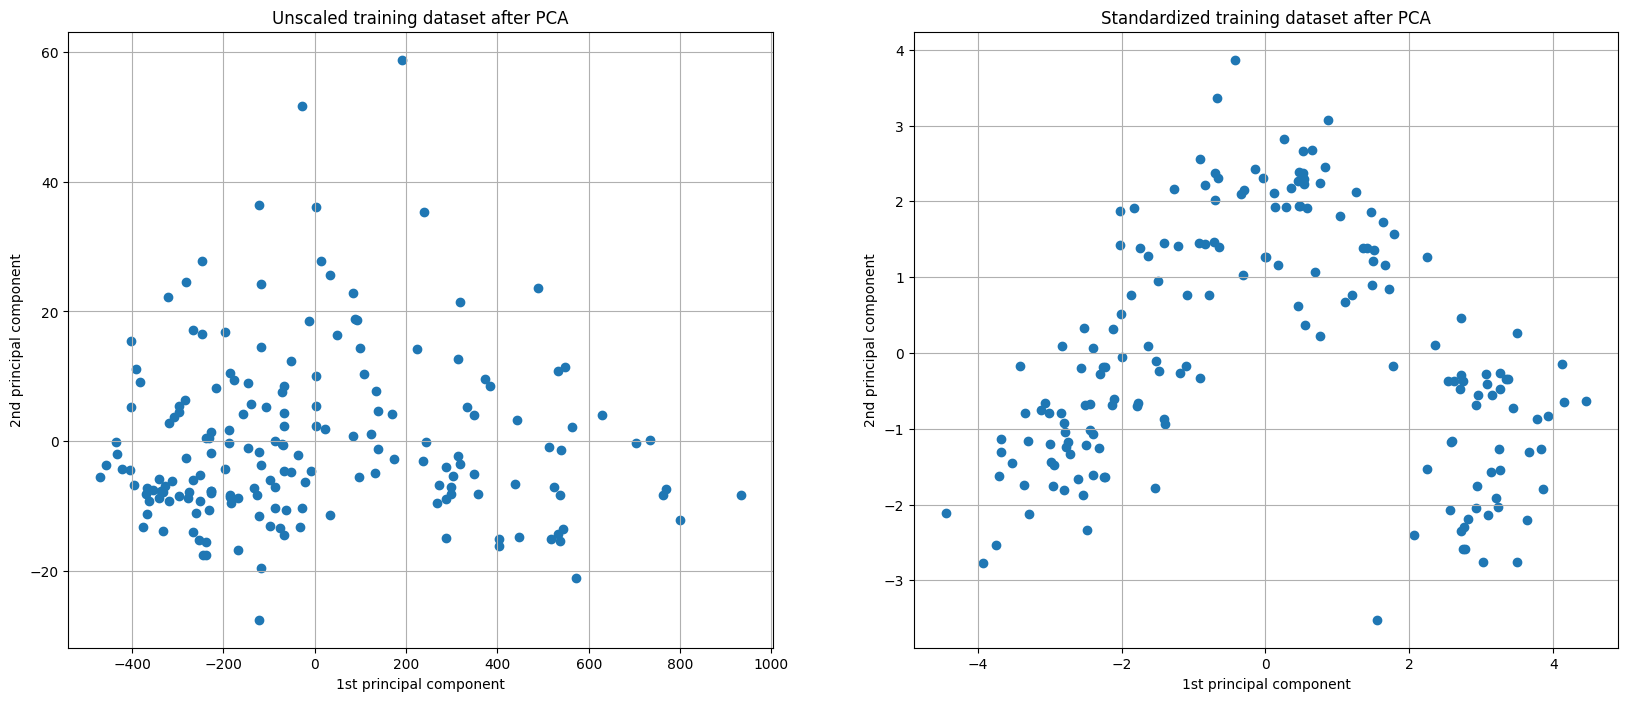

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 對未標準化的資料做PCA
pca = PCA().fit(ratings)
Z = pca.transform(ratings)  
# 對標準化的資料做PCA
scaler = StandardScaler()
scaler.fit(ratings_)
ratings_ = scaler.transform(ratings_)
pca = PCA().fit(ratings_)
Z1 = pca.transform(ratings_) 
# 做圖
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
ax[0].scatter(Z[:,0], Z[:,1])
ax[0].set_xlabel('1st principal component')
ax[0].set_ylabel('2nd principal component')
ax[0].set_title("Unscaled training dataset after PCA")
ax[0].grid(True)
ax[1].scatter(Z1[:,0], Z1[:,1])
ax[1].set_xlabel('1st principal component')
ax[1].set_ylabel('2nd principal component')
ax[1].grid(True)
ax[1].set_title("Standardized training dataset after PCA")
plt.show()



由右圖可以看出兩個主成分包含三個群組，並往下將此三組以顏色區隔
<hr>

(5) 再依據每個資料的標籤，為每個在散布圖上的資料點依據標籤塗上顏色
- 左圖為資料不做標準化，得到標籤顏色分類的散佈圖。
- 右圖為資料標準化後，得到標籤顏色分類的的散佈圖。

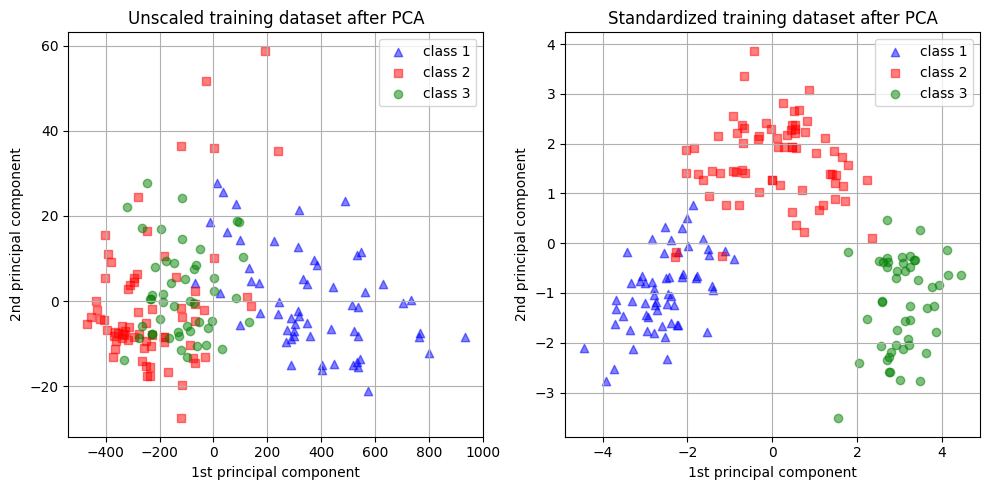

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 對未標準化的資料做PCA
pca = PCA().fit(ratings)
Z = pca.transform(ratings)  
# 對標準化的資料做PCA
scaler = StandardScaler()
scaler.fit(ratings_)
ratings_ = scaler.transform(ratings_)
pca = PCA().fit(ratings_)
Z1 = pca.transform(ratings_) 
# 做圖
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=Z[y == target_class, 0],
        y=Z[y == target_class, 1],
        color=color,
        label=f"class {target_class +1}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=Z1[y == target_class, 0],
        y=Z1[y == target_class, 1],
        color=color,
        label=f"class {target_class +1}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Unscaled training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

_ = plt.tight_layout()
    

結論:

由比較圖可以看出資料是否做標準化相當重要，未做標準化主成分分析後並不能明確分群;

做完標準化之後，才能明顯區分來自不同酒莊的酒。
<hr>

(6) 採取三個主成分，並繪製立體圖:
- 此圖為原始資料未做標準化得出的結果


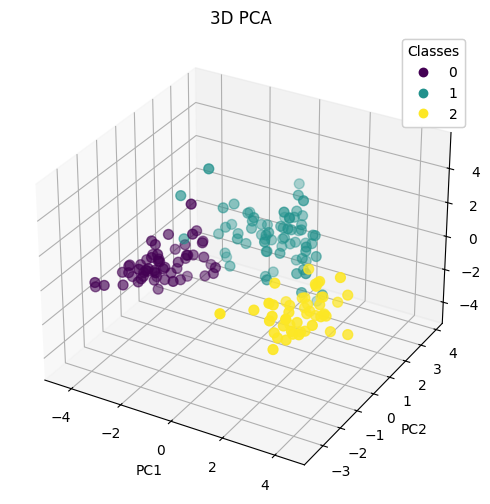

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

# Load the wine dataset
X, y = load_wine(return_X_y=True)

# unscale data Perform PCA
pca = PCA(n_components=3)
Z1 = pca.fit_transform(X)

#scale data preform PCA
scaler = StandardScaler()
scaler.fit(ratings_)
ratings_ = scaler.transform(ratings_)
pca = PCA().fit(ratings_)
Z1 = pca.transform(ratings_) 

# Plot 3D figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(Z1[:,0], Z1[:,1], Z1[:,2], c=y, cmap='viridis', s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA')

# Legend
legend = ax.legend(*scatter.legend_elements(), title='Classes')
ax.add_artist(legend)
plt.show()


可以觀察到，第一個主成份的級距與另外兩座標軸相差極大，因此將資料標準化後再次觀察

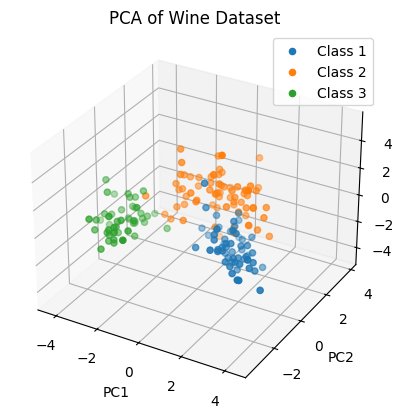

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the wine dataset
X, y = load_wine(return_X_y=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=3)
Z1 = pca.fit_transform(X_scaled)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each class separately
for i in np.unique(y):
    ax.scatter(Z1[y == i, 0], Z1[y == i, 1], Z1[y == i, 2], label=f'Class {i+1}')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA of Wine Dataset')
ax.legend()
plt.show()


做完資料標準化後，此時三個主成份級距接近，較能觀察出資料分群的概況，並嘗試轉化圖形角度，找出最適合看出分群概況的3D立體圖

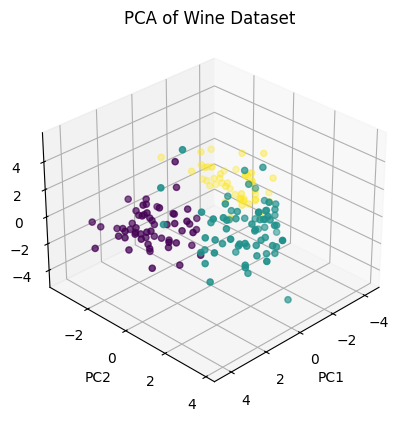

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the wine dataset
X, y = load_wine(return_X_y=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=3)
Z1 = pca.fit_transform(X_scaled)

# Plot 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(Z1[:, 0], Z1[:, 1], Z1[:, 2], c=y, cmap='viridis', marker='o')

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA of Wine Dataset')


# Rotate the plot for better viewing angle
ax.view_init(elev=30, azim=45)
plt.show()


上圖的角度最能明確觀察到分群的狀況

(7) $Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1$ 與 $Z_2$ 的組成係數，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=1).fit(X) # 取 第 一 個 特 徵 向 量
pca = PCA().fit(ratings_) # 進 行 主 成 分 分 析
#print(pca.explained_variance_ratio_) # 共 變 異 矩 陣 特 徵 值 佔 比
# print(pca.explained_variance_) # 共 變 異 矩 陣 的 特 徵 值
# print(pca.components_) # 共 變 異 矩 陣 的 特 徵 向 量
eigvals = pca.explained_variance_
#print(eigvals)
eigvecs = pca.components_.T # by column [v1 v2]
print(eigvecs)

[[-0.13632501 -0.48416087 -0.20740081 -0.08191848 -0.25089415 -0.13517139
  -0.09269887 -0.42154435 -0.45019071  0.31127983 -0.22154641 -0.26411262
  -0.05610645  0.09062605]
 [ 0.22267638 -0.22359095  0.08879606  0.46988824 -0.18860015 -0.59841948
   0.3743698  -0.08757556 -0.00602569 -0.32592413  0.06839251  0.1192121
   0.06675544 -0.02522531]
 [-0.00225793 -0.31585588  0.62610236 -0.24984122 -0.0935236  -0.10799983
  -0.16708856  0.17208034  0.26249446 -0.12452347 -0.49452428 -0.04502305
  -0.19201787 -0.00163582]
 [ 0.22429849  0.01161574  0.6119896   0.07199322  0.0465675   0.08811224
  -0.26872469 -0.41324857 -0.11863342  0.15716811  0.47461722 -0.06131271
   0.20007784 -0.09536107]
 [-0.12463016 -0.30055143  0.13098458 -0.16321412  0.77833048 -0.14483831
   0.32957951  0.14881189 -0.25253628  0.12773363  0.07119731  0.06116074
   0.05829909  0.02230075]
 [-0.35926404 -0.06711983  0.14650775  0.19098521 -0.14466563  0.14809748
  -0.03789829  0.36343884 -0.40637354 -0.30772263  0

結論:

由上結果可以看出，透過觀察組成的係數，可以清楚理解原變數在建構$Z_1$ $Z_2$新變數時的重要性。係數的絕對值越大，則表示原變數的貢獻越大；相反的，如果組成係數趨近於零，則表示原始變數幾乎沒貢獻，在數據解釋中較不重要。而相關係數可以更直觀的理解變數之間的關係；因此，綜合考慮兩點才能更更全面的理解數據。
<HR>

### 第 2 題：
有一組關於乳癌患者腫瘤的影像量測資料，資料內容包括30個變數，樣本數為 569 位患者，區分為兩個群組，分別是 Malignant（惡性腫瘤）與 Benign（良性腫瘤）。利用這組資料回答下列問題：

(1) 繪製變數間的相關係數圖，以觀察變數間是否存在相關性。
- 在sklearn套件中下載breast_cancer資料
- 由下圖可知，方框越紅代表越最高度相關

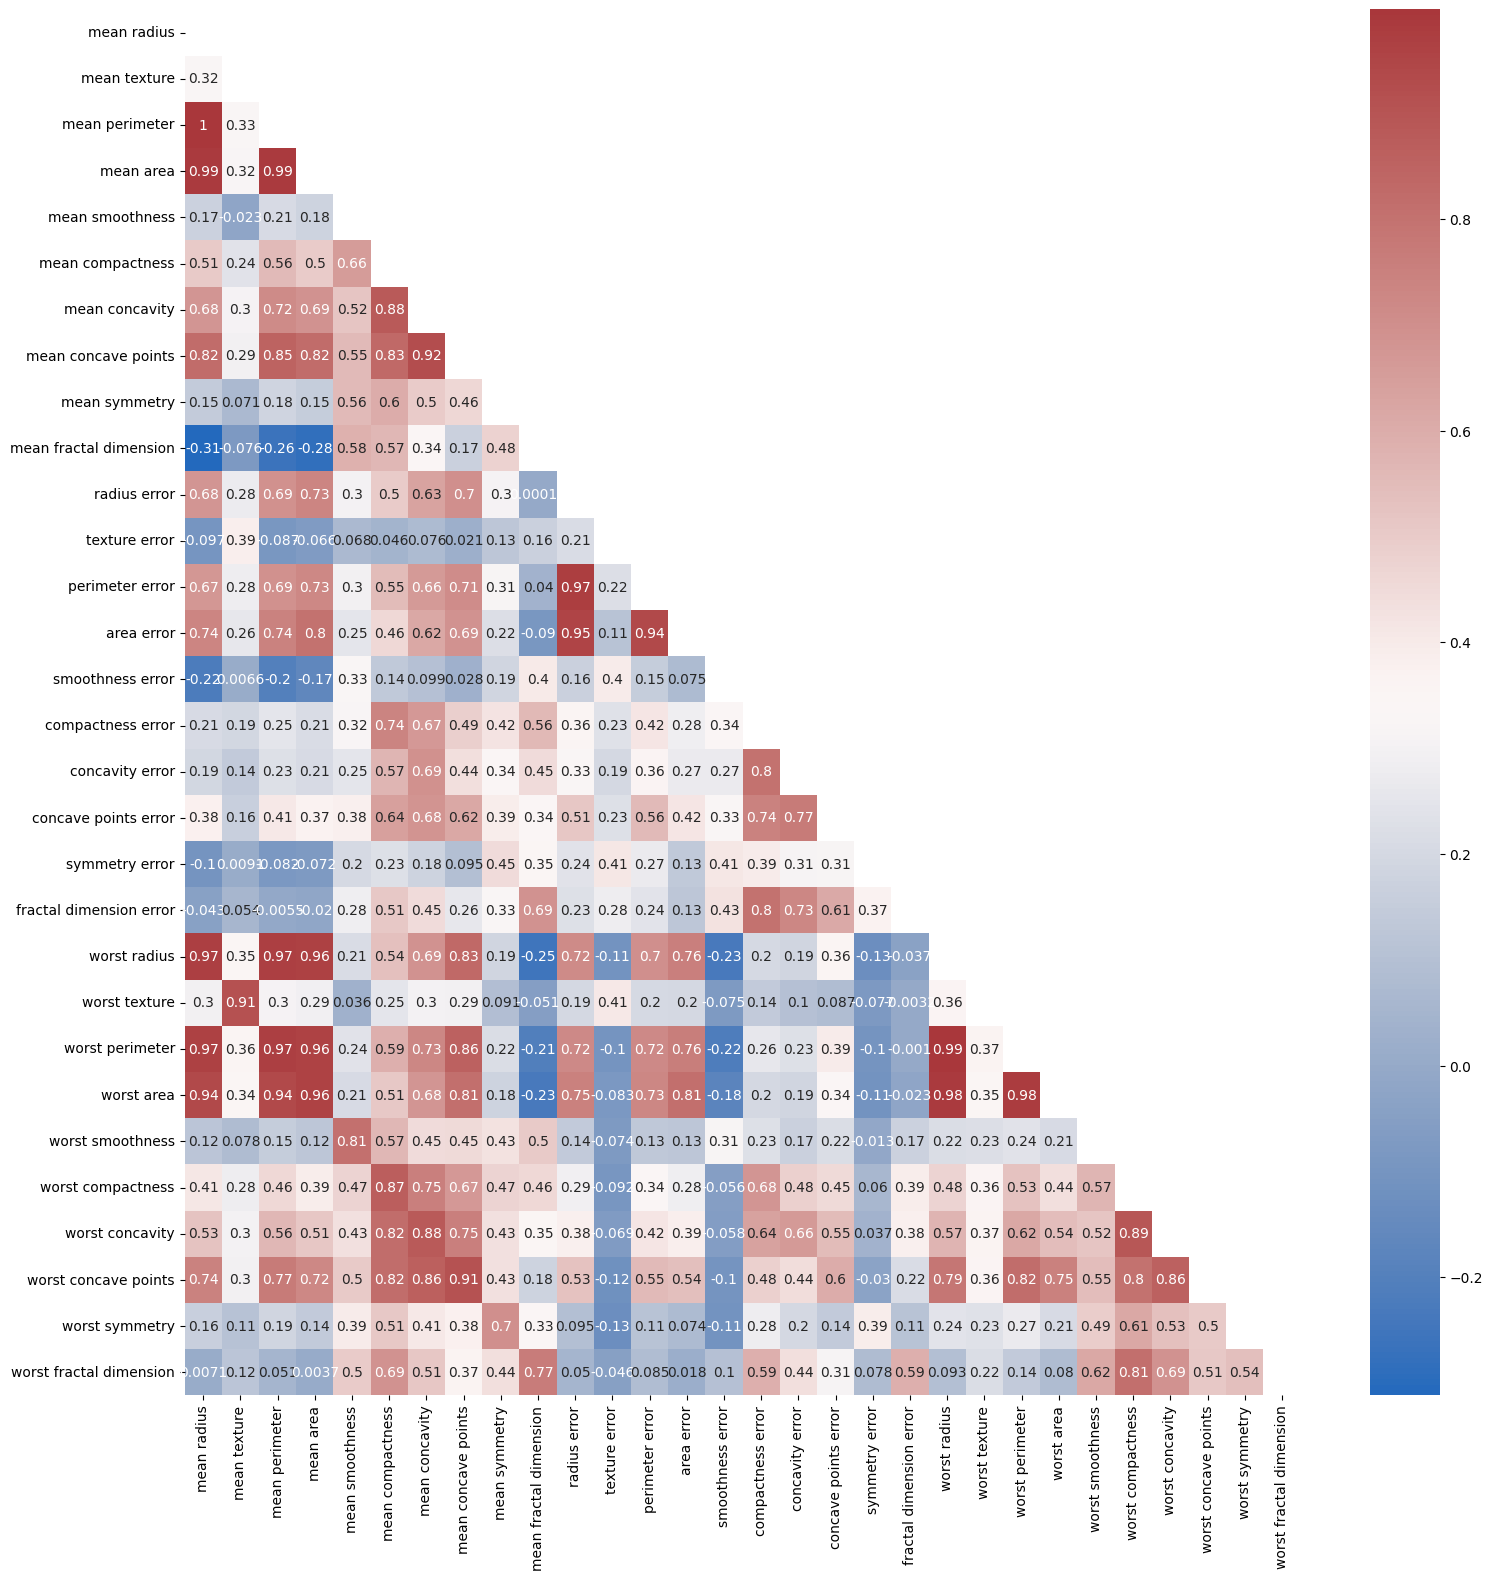

In [3]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
labels = X.columns
# Plot the correlation matrix
plt.figure(figsize = (18, 18))
R = X.corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mask 
seaborn.heatmap(R, annot=True, mask = mask, cmap='vlag')
plt.show()

結論: 
- 變數很多，故須將圖片放大才能清楚呈現變數之間的相關性
- 相關係數矩陣為對稱矩陣，因此僅呈現下半部。
<hr>

(2)繪製含每個化學成分變數盒鬚圖，觀察每個變數的 scaling，分別畫為標準化與標準化。

- 下圖為未標準化的資料
- breast_canser_data_array為未標準化資料矩陣

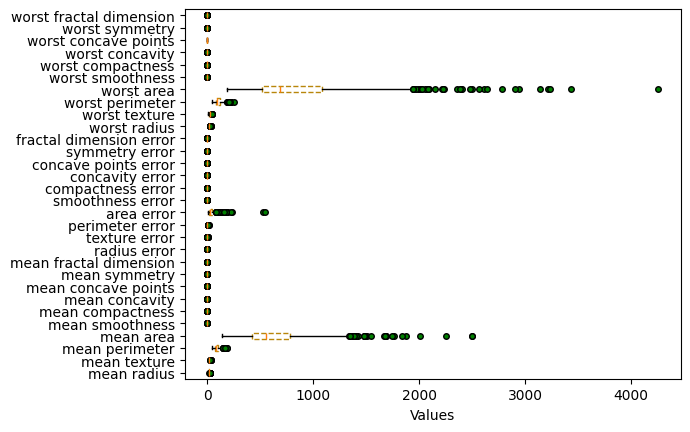

In [28]:
from sklearn.datasets import load_breast_cancer
import numpy as np
breast_canser = load_breast_cancer(as_frame=True)
breast_canser_data =  breast_canser.data
breast_canser_target = breast_canser.target
breast_canser_data_array = np.array(breast_canser_data)
breast_canser_data_cate = breast_canser_data.columns
fig, ax = plt.subplots()
boxprops = dict(linestyle = '--', linewidth = 1, \
color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green',
markersize = 4, linestyle = 'none')
ax.boxplot(breast_canser_data_array
, boxprops = boxprops, \
flierprops = flierprops, \
labels = breast_canser_data_cate
, vert = False)
ax.set_xlabel('Values')
plt.show()


結論:
- 未標準化的資料，明顯發現需要標準化才能有相似的級距
- 可以觀察到 worst area 與mean area 這兩項變數的值特別不平衡
<hr>

下圖為已標準化資料的盒鬚圖

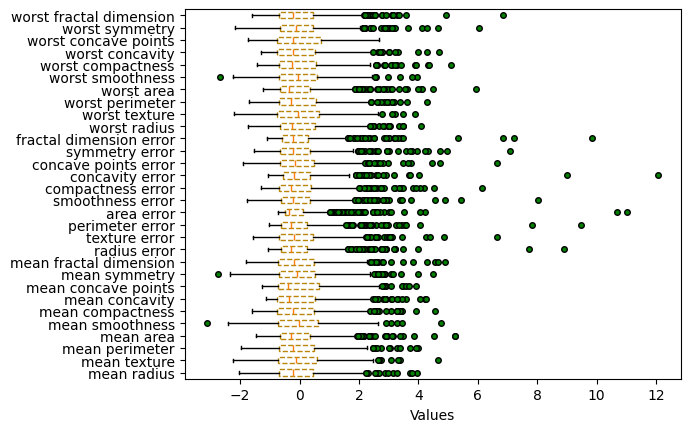

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(breast_canser_data_array)
breast_canser_data_array_ = scaler.transform(breast_canser_data_array)
breast_canser_data_cate = breast_canser_data.columns
fig, ax = plt.subplots()
boxprops = dict(linestyle = '--', linewidth = 1, \
color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green',
markersize = 4, linestyle = 'none')
ax.boxplot(breast_canser_data_array_, boxprops = boxprops, \
flierprops = flierprops, \
labels = breast_canser_data_cate, vert = False)
ax.set_xlabel('Values')
plt.show()

結論:在資料分析前都需要資料前處理，以確保不會有極端不平衡的狀況出現
<hr>

(3) 進行主成分分析，繪製特徵值由大而小的分布與 scree plot與累積百分比的 pareto plot。



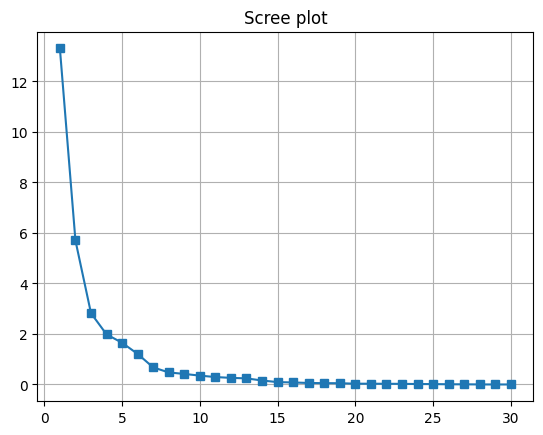

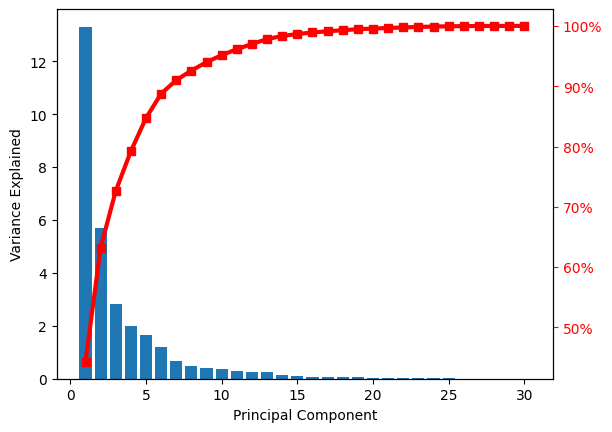

In [8]:
import numpy as np
from numpy.linalg import eig
from numpy.linalg import inv
from matplotlib.ticker import PercentFormatter
Sx = np.cov(breast_canser_data_array_.T, bias=False)
w, v = eig(Sx)
idx = np.argsort(-w) #sort eigenvalues in descending order
# idx = np.argsort(w)[::−1]
eigvals = w[idx]
eigvecs = v[:, idx]
#開始作主成分分析圖
plt.figure()
x = np.arange(1, 1+len(eigvals))
plt.plot(x, eigvals, marker='s')
plt.title('Scree plot')
plt.grid(True)
plt.show()
fig, ax = plt.subplots()
x = np.arange(1, 1+len(eigvals))
ax.bar(x, eigvals)
ax2 = ax.twinx()
ax2.plot(x, eigvals.cumsum()/eigvals.sum()*100, \
marker='s', color='red', lw=3)
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance Explained')
plt.show()

結論:

可以觀察到約採用五個主成分，其解釋變異量就高達85%，因此這是一筆適合用PCA維度縮減的資料檔。
<HR>

(4) 利用主成分分析取得前兩項成分，並繪製其散布圖
- 左圖為資料不做標準化，取前兩大主成分得到的散佈圖。
- 右圖為資料標準化後，取兩個主成分得到的散佈圖。

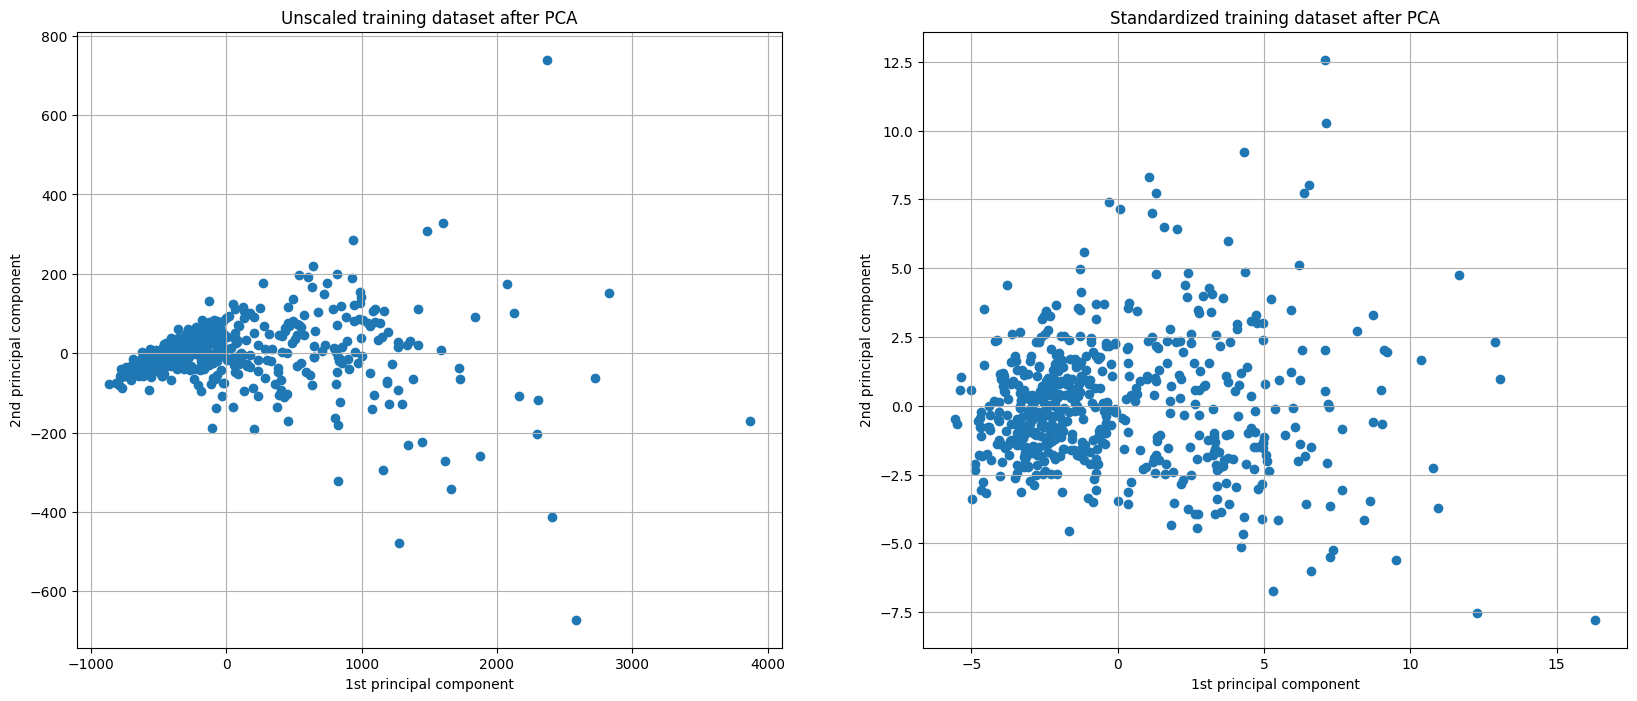

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 對未標準化的資料做PCA
pca = PCA().fit(breast_canser_data_array)
Z = pca.transform(breast_canser_data_array)  
# 對標準化的資料做PCA
scaler = StandardScaler()
scaler.fit(breast_canser_data_array_)
ratings_ = scaler.transform(breast_canser_data_array_)
pca = PCA().fit(breast_canser_data_array_)
Z1 = pca.transform(breast_canser_data_array_) 
# 做圖
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
ax[0].scatter(Z[:,0], Z[:,1])
ax[0].set_xlabel('1st principal component')
ax[0].set_ylabel('2nd principal component')
ax[0].set_title("Unscaled training dataset after PCA")
ax[0].grid(True)
ax[1].scatter(Z1[:,0], Z1[:,1])
ax[1].set_xlabel('1st principal component')
ax[1].set_ylabel('2nd principal component')
ax[1].grid(True)
ax[1].set_title("Standardized training dataset after PCA")
plt.show()

結論:

標準化後兩個主成分的級距較一致。

較第一題不太一樣的是，標準化後的資料進行主成分分析仍然觀察不太到點分群的狀況。

因次必須往下將CLASSES以不同顏色標出方可觀察。
<hr>

(5) 再依據每個資料的標籤，為每個在散布圖上的資料點依據標籤塗上顏色
- 左圖為資料不做標準化，得到標籤顏色分類的散佈圖。
- 右圖為資料標準化後，得到標籤顏色分類的的散佈圖。

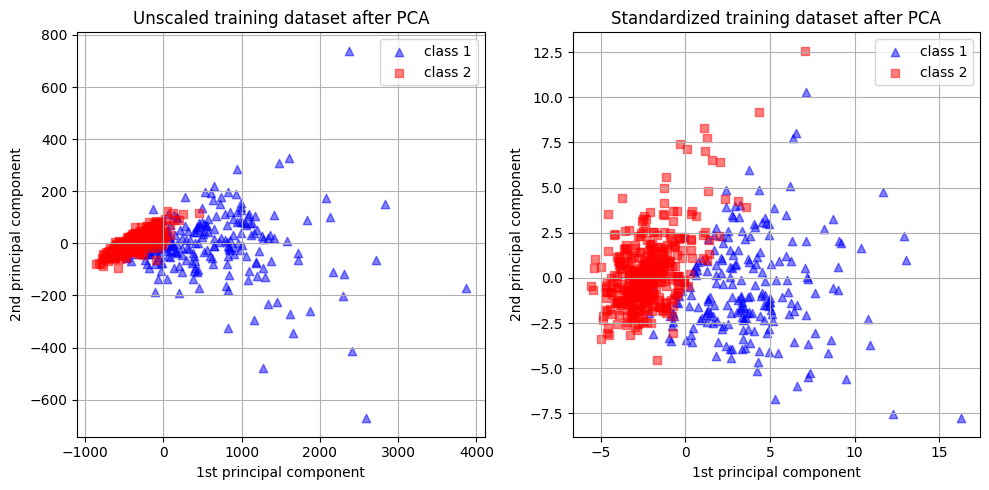

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 做圖
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

target_classes = range(0, 3)
colors = ("blue", "red")
markers = ("^", "s")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=Z[y == target_class, 0],
        y=Z[y == target_class, 1],
        color=color,
        label=f"class {target_class+1}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=Z1[y == target_class, 0],
        y=Z1[y == target_class, 1],
        color=color,
        label=f"class {target_class+1}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Unscaled training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

_ = plt.tight_layout()

結論:

做完標準化後，兩個類別的資料分散較平均，兩個主成分的級距也較為相似。

而未做標準化的資料分配不平均，兩個主成分的級距也不相似
<hr>

(6) 採取三個主成分，並繪製立體圖:
- 此圖為原始資料未做標準化得出的結果

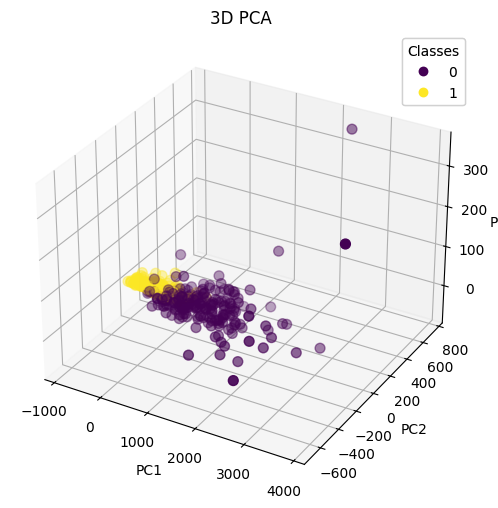

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
# unscale data Perform PCA
pca = PCA(n_components=3)
Z1 = pca.fit_transform(X)
# Plot 3D figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(Z1[:,0], Z1[:,1], Z1[:,2], c=y, cmap='viridis', s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA')

# Legend
legend = ax.legend(*scatter.legend_elements(), title='Classes')
ax.add_artist(legend)
plt.show()


發現三個主成分的級距都不一致，也不易觀察到分群的情況
<hr>

- 標準化後得出的結果

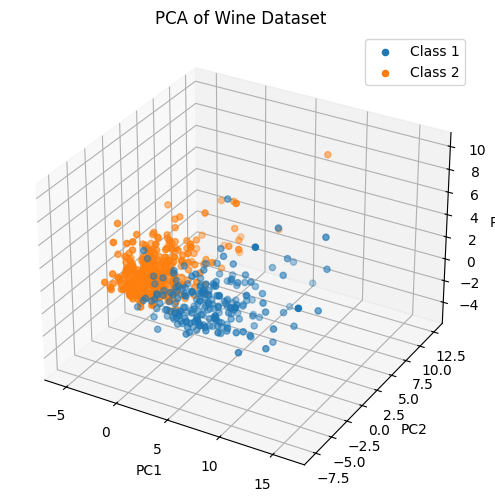

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

#scale data preform PCA
scaler = StandardScaler()
scaler.fit(breast_canser_data_array_)
ratings_ = scaler.transform(breast_canser_data_array_)
pca = PCA(n_components=3).fit(breast_canser_data_array_)
Z1 = pca.transform(breast_canser_data_array_) 

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot each class separately
for i in np.unique(y):
    ax.scatter(Z1[y == i, 0], Z1[y == i, 1], Z1[y == i, 2], label=f'Class {i+1}')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA of Wine Dataset')
ax.legend()
plt.show()

級距較一致，也較能區分兩個類別的資料點
<hr>

- 轉換角度得出的結果

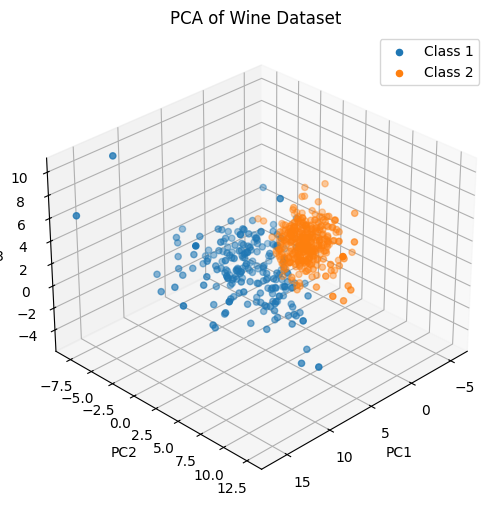

In [12]:
from sklearn.datasets import load_breast_cancer
# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

#scale data preform PCA
scaler = StandardScaler()
scaler.fit(breast_canser_data_array_)
ratings_ = scaler.transform(breast_canser_data_array_)
pca = PCA(n_components=3).fit(breast_canser_data_array_)
Z1 = pca.transform(breast_canser_data_array_) 

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot each class separately
for i in np.unique(y):
    ax.scatter(Z1[y == i, 0], Z1[y == i, 1], Z1[y == i, 2], label=f'Class {i+1}')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA of Wine Dataset')
ax.legend()
ax.view_init(elev=30, azim=45)
plt.show()

結論:

因此未來在做主成分分析時，需要先將資料做標準化動作，然後觀察取幾個主成分最能滿足

維持原數據類別間的最大變異量，同時達到維度縮減的目的。

(7) $Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1$ 與 $Z_2$ 的組成係數，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=1).fit(X) # 取 第 一 個 特 徵 向 量
pca = PCA().fit(breast_canser_data_array_) # 進 行 主 成 分 分 析
#print(pca.explained_variance_ratio_) # 共 變 異 矩 陣 特 徵 值 佔 比
# print(pca.explained_variance_) # 共 變 異 矩 陣 的 特 徵 值
# print(pca.components_) # 共 變 異 矩 陣 的 特 徵 向 量
eigvals = pca.explained_variance_
#print(eigvals)
eigvecs = pca.components_.T # by column [v1 v2]
print(eigvecs)

[[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
   3.77863538e-02  1.87407904e-02 -1.24088340e-01 -7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02  5.95061348e-02  5.11187749e-02 -1.50583883e-01
   2.02924255e-01  1.46712338e-01 -2.25384659e-01 -4.96986642e-02
  -6.85700057e-02  7.29289034e-02 -9.85526942e-02  1.82579441e-01
   1.92264989e-02 -1.29476396e-01 -1.31526670e-01  2.11194013e-01
   2.11460455e-01 -7.02414091e-01]
 [ 1.03724578e-01 -5.97060883e-02  6.45499033e-02 -6.03050001e-01
  -4.94688505e-02 -3.21788366e-02  1.13995382e-02  1.30674825e-01
   1.12699390e-01  2.40934066e-01 -3.02243402e-01  2.54896423e-01
   2.03461333e-01 -2.15600995e-02  1.07922421e-01 -1.57841960e-01
  -3.87061187e-02 -4.11029851e-02 -2.97886446e-02 -2.44134993e-01
   4.48369467e-01  9.48006326e-02 -5.54997454e-04 -9.87867898e-02
  -8.47459309e-02 -2.45566636e-02 -1.73573093e-02 -6.58114593e-05
  -1.05339342e-02 -2.73661018e-04]
 [ 2.2

結論:

由上結果可以看出，透過觀察組成的係數，可以清楚理解原變數在建構$Z_1$ $Z_2$新變數時的重要性。係數的絕對值越大，則表示原變數的貢獻越大；相反的，如果組成係數趨近於零，則表示原始變數幾乎沒貢獻，在數據解釋中較不重要。而相關係數可以更直觀的理解變數之間的關係；因此，綜合考慮兩點才能更更全面的理解數據。